## 这是关于评价模型的记录。
模型一共有以下几类：
- 主成分分析
- 因子分析
- DEA
- 熵值法
- 层次分析法
- 物元法
- 模糊评判法

### 主成分分析（PCA）：降维


降维基本思想：提取数据里最主要的方面，忽略其他方面（即降维）

基本方法：基变换
$$
Y=P X
$$
其中 $Y$ 是样本在新空间的表达, $P$ 是基向量, $X$ 是原始样本。我们可知选择不同的基可以对 一组数据给出不同的表示, 同时当基的数量少于原始样本本身的维数则可达到降维的效果, 矩阵 表示如下:
$$
\left(\begin{array}{c}
p_1 \\
p_2 \\
\vdots \\
p_R
\end{array}\right)\left(\begin{array}{llll}
a_1 & a_2 & \cdots & a_M
\end{array}\right)=\left(\begin{array}{cccc}
p_1 a_1 & p_1 a_2 & \cdots & p_1 a_M \\
p_2 a_1 & p_2 a_2 & \cdots & p_2 a_M \\
\vdots & \vdots & \ddots & \vdots \\
p_R a_1 & p_R a_2 & \cdots & p_R a_M
\end{array}\right)
$$
其中 $p_i \in\left\{p_1, p_2, \ldots, p_R\right\}, \quad p_i \in \mathbb{R}^{1 * N}$ 是一个行向量, 表示第 $i$ 个基;
$a_j \in\left\{a_1, a_2, \ldots a_M\right\}, a_i \in \mathbb{R}^{N * 1}$ 是一个列向量, 表示第 $j$ 个原始数据记录。特别要注意的 是, 这里 $R$ 可以小于 $N$, 而 $R$ 决定了变换后数据的维数。在这里可以把结果的columns看成是对P的linear combinations，所以$dim(Y) = R$。

主成分与原始变量之间的关系：
1. 主成分是原始变量的线性组合
2. 主成分的数量相对于原始数量更少
3. 主成分保留了原始变量的大部分信息
4. 主成分之间相互独立

条件1，2上述方法已描述，接下来通过对PCA具体步骤的分析来说明条件3和条件4。
具体步骤：
1. 计算协方差矩阵：即将数据标准化
   1. 对于一组样本资料 $\mathrm{X}$, 其中有 $\mathrm{m}$ 个观测值 $x_1, x_2, \ldots, x_m$, 共 $\mathrm{n}$ 个样。
      1. 计算每一列的平均值 $\mu_i=\frac{1}{n} \sum_{j=1}^n x_{j i}$
      2. 每一列的方差 $\sigma_i^2=\frac{1}{n-1} \sum_{j=1}^n\left(x_{j i}-\mu_i\right)^2$
      3. 对数据进行标准化处理, $z_{j i}=\frac{x_{j i}-\mu_i}{\sigma_i}$, 得到
$$
Z=\left[\begin{array}{cccc}
z_{11} & z_{12} & \cdots & z_{1 m} \\
z_{21} & z_{22} & \cdots & z_{2 m} \\
\vdots & \vdots & \vdots & \vdots \\
z_{n 1} & z_{n 2} & \cdots & z_{n m}
\end{array}\right]
$$
2. 计算相关系数矩阵$r_{i j}=\frac{\sum_{k=1}^n z_{k i} * z_{k j}}{n-1},(i, j=1,2, \ldots, m)$
得到相关系数矩阵R
$$
R=\left[\begin{array}{cccc}
r_{11} & r_{12} & \cdots & r_{1 m} \\
r_{21} & r_{22} & \cdots & r_{2 m} \\
\vdots & \vdots & \vdots & \vdots \\
r_{m 1} & r_{m 2} & \cdots & r_{m m}
\end{array}\right]
$$.其实就是两向量点乘来判断向量的相关度。这一思想非常重要。
一般的 $r_{ij}$如果大于0则是正相关，小于0则是负相关
$$
\begin{aligned}
&\begin{array}{cc}
\hline \text { 相关系数绝对值 }|r| & \text { 相关性程度 } \\
\hline 1 & \text { 完全相关 } \\
{[0.8,1)} & \text { 高度相关 } \\
{[0.5,0.8)} & \text { 中度相关 } \\
{[0.3,0.5)} & \text { 低度相关 } \\
{[0,0.3)} & \text { 不相关 } \\
\hline
\end{array}\\
&\text { 相关性程度大小 }
\end{aligned}
$$
3. 对R寻找特征值，并对特征值排序，并对应的求出特征向量作为权重
$$
\text { 特征值 } \lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_{\mathrm{p}} \geq 0 \text {, }
$$
$$
\text { 特征向量： } a_1=\left[\begin{array}{c}
a_{11} \\
a_{21} \\
\vdots \\
a_p 1
\end{array}\right], a_2=\left[\begin{array}{c}
a_{12} \\
a_{22} \\
\vdots \\
a_{\mathrm{p} 2}
\end{array}\right], \cdots, a_p=\left[\begin{array}{c}
a_{1 p} \\
a_{2 p} \\
\vdots \\
a_{p p}
\end{array}\right]
$$
4. 计算contribution和accumulated contribution
$$
\text { 贡献率 }=\frac{\lambda_{\mathrm{i}}}{\sum_{\mathrm{k}=1}^{\mathrm{p}} \lambda_{\mathrm{k}}}, \quad \text { 累加贡献率 }=\frac{\sum_{\mathrm{k}=1}^{\mathrm{i}} \lambda_{\mathrm{k}}}{\sum_{\mathrm{k}=1}^{\mathrm{p}} \lambda_{\mathrm{k}}}, \quad(\mathrm{i}=1,2, \cdots, \mathrm{p})
$$
5. 一般我们取累积贡献率到的80%-85%之前的指标（即贡献率之和已经超过80%的指标）
6. 可以根据对原始数据的成分的负荷（eigenvector对应位置数字的大小情况）来归纳新的成分意义（可以参照下文代码的例子）
$$
\text { 第i个主成分： } \mathrm{F}_{\mathrm{i}}=\mathrm{a}_{1 \mathrm{i}} \mathrm{X}_1+\mathrm{a}_{2 \mathrm{i}} \mathrm{X}_2+\cdots+\mathrm{a}_{\mathrm{pi}} \mathrm{X}_{\mathrm{p}}
$$

In [108]:
import numpy as np

$$
\begin{array}{|r|r|r|r|r|r|}
\hline \text { 客户编号 } & \text { 能力 } & \text { 品格 } & \text { 担保 } & \text { 资本 } & \text { 环境 } \\
\hline 1 & 66 & 64 & 65 & 65 & 65 \\
\hline 2 & 65 & 63 & 63 & 65 & 64 \\
\hline 3 & 57 & 58 & 63 & 59 & 66 \\
\hline 4 & 67 & 69 & 65 & 68 & 64 \\
\hline 5 & 61 & 61 & 62 & 62 & 63 \\
\hline 6 & 64 & 65 & 63 & 63 & 63 \\
\hline 7 & 64 & 63 & 63 & 63 & 64 \\
\hline 8 & 63 & 63 & 63 & 63 & 63 \\
\hline 9 & 65 & 64 & 65 & 66 & 64 \\
\hline 10 & 67 & 69 & 69 & 68 & 67 \\
\hline 11 & 62 & 63 & 65 & 64 & 64 \\
\hline 12 & 68 & 67 & 65 & 67 & 65 \\
\hline 13 & 65 & 65 & 66 & 65 & 64 \\
\hline 14 & 62 & 63 & 64 & 62 & 66 \\
\hline 15 & 64 & 66 & 66 & 65 & 67 \\
\hline
\end{array}
$$

In [109]:
###First create the sample data
data =  [[66 , 64 , 65 , 65 , 65], \
    [65 , 63 , 63 , 65 , 64], \
    [57 , 58 , 63 , 59 , 66], \
    [67 , 69 , 65 , 68 , 64], \
    [61 , 61, 62 , 62 , 63], \
    [64 , 65 , 63 , 63 , 63], \
    [64 , 63 , 63 , 63, 64], \
    [63 , 63 , 63 , 63 , 63], \
    [65 , 64 , 65 , 66 , 64], \
    [67 , 69 , 69 , 68 , 67], \
    [62 , 63 , 65 , 64 , 64], \
    [68 , 67 , 65 , 67 , 65], \
    [65 , 65 , 66 , 65 , 64], \
    [62 , 63 , 64 , 62 , 66], \
    [64 , 66 , 66 , 65 , 67]]



In [110]:
###Second normalize the data
data = np.array(data)
mu = np.mean(data, axis=0)
diviation = np.std(data, axis=0)
data_normalized = (data - mu) / diviation
###Third calculate the correlation coefficient matrix
cc_matrix = np.corrcoef(data_normalized, rowvar=0)
###Fourth calculate the eigenvalues and eigenvectors of the correlation coefficient matrix
eigenvalues, eigenvectors = np.linalg.eig(cc_matrix)
###Fifth calculate the cumulative variance
contribution = eigenvalues / np.sum(eigenvalues)
accumulated_contribution = np.cumsum(contribution)
print("-----------------")
print("The accumulated contribution of each principal component is {}".format(accumulated_contribution))
print("-----------------")
###Sixth calculate the principal components by multiplying the normalized data by the first three eigenvectors
principal_components = np.dot(data_normalized, eigenvectors[:, 0:2])
print("The principal components are {}".format(principal_components))
###Now finish the PCA process

-----------------
The accumulated contribution of each principal component is [0.69063568 0.93525354 0.97099903 0.98015237 1.        ]
-----------------
The principal components are [[ 0.66701255 -0.07769953]
 [-0.37447048  0.83884504]
 [-3.75614329 -2.1735795 ]
 [ 2.2827183   1.17615998]
 [-2.52791503  0.84488665]
 [-0.76348234  1.26625679]
 [-0.9896892   0.54100904]
 [-1.31409197  1.04623075]
 [ 0.56040823  0.51439486]
 [ 3.78023389 -1.63035825]
 [-0.59954801 -0.07959016]
 [ 2.0183348   0.48813021]
 [ 0.79389686  0.2458446 ]
 [-1.01137617 -1.28231499]
 [ 1.23411185 -1.7182155 ]]


### 熵权法：客观赋权

核心思想：通过数据的熵来选取其权重 -> 局部差异大的数据更为重要

基本步骤：
1. 选取指标：剔除次要指标
   1. 方法：最小均方差法/极大极小离差法
   2. 结果：m个主要指标${x_1, x_2, \cdots, x_n}$, n个样本
2. 极差变换法
   1. 极大型指标：$$a_{i j}^*=\frac{a_{i j}-\min _{1 \leq i \leq n} a_{i j}}{\max _{1 \leq i \leq n} a_{i j}-\min _{1 \leq i \leq n} a_{i j}}(1 \leq i \leq n, 1 \leq j \leq m)$$
   2. 极小型指标：$$a_{i j}^*=\frac{\max _{1 \leq i \leq n} a_{i j}-a_{i j}}{\max _{1 \leq i \leq n} a_{i j}-\min _{1 \leq i \leq n} a_{i j}}(1 \leq i \leq n, 1 \leq j \leq m)$$
   3. 结果：各样本的指标值区间在0.00-1.00之间
3. 利用熵计算各指标比重。假设$x_{ij}$指第i个样本在第j项指标下所占比重
   1. probability p：$p_{i j}=\frac{x_{i j}}{\sum_{i=1}^n x_{i j}}, \quad i=1, \cdots, n, j=1, \cdots, m$
   2. information entropy: $e_j=-k \sum_{i=1}^n p_{i j} \ln \left(p_{i j}\right), \quad j=1, \cdots, m$ ,$k=1 / \ln (n)>0$。熵越小，离散程度越小
   3. 获取离散度并normalize: $$d_j=1-e_j, \quad j=1, \cdots, m$$
$$w_j=\frac{d_j}{\sum_{j=1}^m d_j}, \quad j=1, \cdots, m$$
4. 获得得分： $s_i=\sum_{j=1}^m w_j x_{i j}, \quad i=1, \cdots, n$

注意事项：
1. 为什么这里要除以 $\ln (\mathrm{n})$ 这个常数?
在前面说过 $\mathrm{p}\left(\mathrm{x}_1\right)=\mathrm{p}\left(\mathrm{x}_2\right)=\ldots=\mathrm{p}\left(\mathrm{x}_{\mathrm{n}}\right)=1 / \mathrm{n}$ 时, $\mathrm{H}(\mathrm{x})$ 取最大值为 $\ln (\mathrm{n})$, 这里除以 $\ln (\mathrm{n})$ 能够使得信息嫡的始终位于 $[0,1]$ 区间上面。
1. $e_j$ 越大，即第 $\mathrm{j}$ 个指标的信息嫡越大，表明第 $\mathrm{j}$ 个指标的信息越多还是越少?
答案是越少。指标相同意味着这个指标的数据没有变 化, 也就是 信息少! 因此需要将其倒转, 即计算信息效用值。

In [111]:
import numpy as np
import matplotlib as plt

In [112]:
### Load data
A = [100, 90, 100, 84, 90, 100, 100, 100, 100]
B = [100, 100, 78.6, 100, 90, 100, 100, 100, 100]
C = [75, 100, 85.7, 100, 90, 100, 100, 100, 100]
D = [100, 100, 78.6, 100, 90, 100, 94.4, 100, 100]
E = [100, 90, 100, 100, 100, 90, 100, 100, 80]
F = [100, 100, 100, 100, 90, 100, 100, 85.7, 100]
G = [100, 100, 78.6, 100, 90, 100, 55.6, 100, 100]
H = [87.5, 100, 85.7, 100, 100, 100, 100, 100, 100]
I = [100, 100, 92.9, 100, 80, 100, 100, 100, 100]
J = [100, 90, 100, 100, 100, 100, 100, 100, 100]
K = [100, 100, 92.9, 100, 90, 100, 100, 100, 100]
data = [A, B, C, D, E, F, G, H, I, J, K]
data = np.array(data)
data

array([[100. ,  90. , 100. ,  84. ,  90. , 100. , 100. , 100. , 100. ],
       [100. , 100. ,  78.6, 100. ,  90. , 100. , 100. , 100. , 100. ],
       [ 75. , 100. ,  85.7, 100. ,  90. , 100. , 100. , 100. , 100. ],
       [100. , 100. ,  78.6, 100. ,  90. , 100. ,  94.4, 100. , 100. ],
       [100. ,  90. , 100. , 100. , 100. ,  90. , 100. , 100. ,  80. ],
       [100. , 100. , 100. , 100. ,  90. , 100. , 100. ,  85.7, 100. ],
       [100. , 100. ,  78.6, 100. ,  90. , 100. ,  55.6, 100. , 100. ],
       [ 87.5, 100. ,  85.7, 100. , 100. , 100. , 100. , 100. , 100. ],
       [100. , 100. ,  92.9, 100. ,  80. , 100. , 100. , 100. , 100. ],
       [100. ,  90. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ],
       [100. , 100. ,  92.9, 100. ,  90. , 100. , 100. , 100. , 100. ]])

In [113]:
### Calculate weights from 0 to 1
### integrate the method into a function
def calc_weights(data_):
    data = data_.copy()
    ### first normalize the data
    for i in range(data.shape[1]):
        data[:, i] = (data[:, i] - min(data[:, i])) / (max(data[:, i]) - min(data[:, i]))
    norm_data = data
    ### calculate possibilities
    possibilities = np.zeros((data.shape[0], data.shape[1]))
    prob_log_prob = np.zeros((data.shape[0], data.shape[1]))
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            possibilities[i, j] = norm_data[i, j] / np.sum(norm_data[:, j])
            prob_log_prob[i, j] = possibilities[i, j] * np.log(possibilities[i, j]) if possibilities[i, j] != 0 else 0
    entropy = np.zeros(data.shape[1])
    ### To handle the zero case, we use the prob_log_prob to calculate the entropy
    for i in range(data.shape[1]):
        entropy[i] = -np.sum(prob_log_prob[:, i])/np.log(data.shape[0])
    duplicates = 1 - entropy
    weights = duplicates / np.sum(duplicates)
    return weights

In [114]:
weights = calc_weights(data)
print("The weights are: {}".format(weights))
### Calculate the score of each model
print(data)
score = np.sum(data * weights, axis=1)
print("The score of each model is: {}".format(score))

The weights are: [0.07578559 0.2191587  0.27137381 0.06559212 0.1051977  0.06559212
 0.06611572 0.06559212 0.06559212]
[[100.   90.  100.   84.   90.  100.  100.  100.  100. ]
 [100.  100.   78.6 100.   90.  100.  100.  100.  100. ]
 [ 75.  100.   85.7 100.   90.  100.  100.  100.  100. ]
 [100.  100.   78.6 100.   90.  100.   94.4 100.  100. ]
 [100.   90.  100.  100.  100.   90.  100.  100.   80. ]
 [100.  100.  100.  100.   90.  100.  100.   85.7 100. ]
 [100.  100.   78.6 100.   90.  100.   55.6 100.  100. ]
 [ 87.5 100.   85.7 100.  100.  100.  100.  100.  100. ]
 [100.  100.   92.9 100.   80.  100.  100.  100.  100. ]
 [100.   90.  100.  100.  100.  100.  100.  100.  100. ]
 [100.  100.   92.9 100.   90.  100.  100.  100.  100. ]]
The score of each model is: [95.7069621  93.14062354 93.17273781 92.77037549 95.84064938 98.01005572
 90.20508545 95.17203466 95.96929203 97.80841298 97.021269  ]


### 层次分析法：主观赋权

基本思想：自己主观选择评判标准和重要性分布

基本步骤：
1. 建立层次结构：将决策的目标、考虑的因素(决策准则)和决策方案，按它们之间的相互关系分为最高层、中间层和最低层，对于相邻两层，较高层为目标层，较低层为因素层
   1. 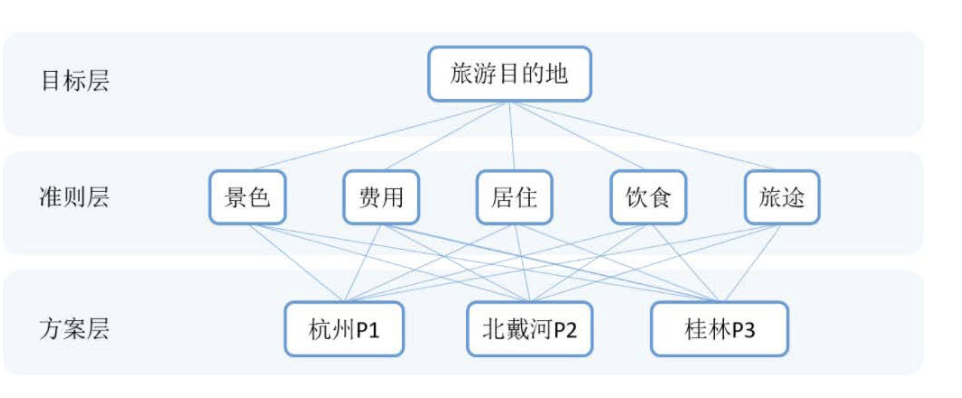
2. 构造判断矩阵：从第二层开始，将目标层的每个因素就因素层的各因素建立判断矩阵。其中的相对重要性因素数字不宜超过9.
   1. 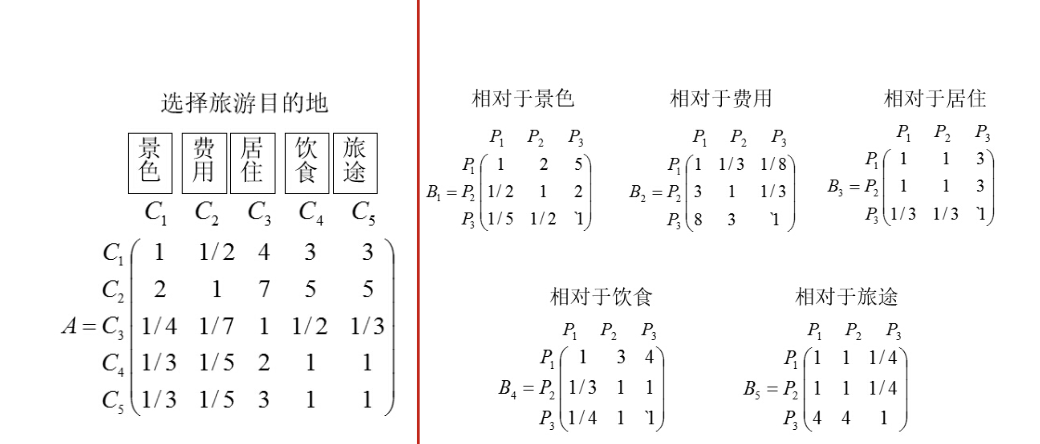
3. 一般的，我们有 $Aw = nw$, for $n*n$ judge matrix.但是前提是$a_{i j} \cdot a_{j k}=a_{i k},(i, j, k=1,2, \cdots, n)$。当这个assumption不成立时，这个矩阵没有non-trivial eigenvalues,此时我们称这个矩阵不一致，进入step 5，判断不一致程度。
4. 如果判断矩阵一致或者不一致程度可以接受（见step 5），我们将最大特征值的特征向量（当然是单位向量）作为权重（为什么？）建立某两层的权重矩阵$W = {w_1, w_2, \cdots, w_n}$。将每两层的权重矩阵相乘, i.e., 从下往上相邻层组为$l^{3}, l^{2}, l^{1}$, 总权重矩阵为$W = W^{3} W^{2} W^{1}$
5. 如果判断矩阵不一致，我们需要判断不一致性是否在允许范围内。公式：$C I=\frac{\lambda-n}{n-1}$，$C R=\frac{C I}{R I}$。其中$\lambda$是判断矩阵中的最大eigenvalue，RI参照表格
\begin{array}{cccccccccccc}
\hline & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 \\
\hline R I & 0 & 0 & 0.58 & 0.9 & 1.12 & 1.24 & 1.32 & 1.41 & 1.45 & 1.49 & 1.51 \\
\hline
\end{array}
当CR < 0.1时，可以使用该特征值来找特征向量，即不一致性可以接受

In [115]:
import numpy as np

In [116]:
### First input the judgement matrix
A = [[1,2,5],[1/2,1,2],[1/5,1/2,1]]
### Use np.linalg.eig to calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
max_eigenvalue = np.real(max(eigenvalues))
max_eigenvalue_index = np.where(eigenvalues == max_eigenvalue)[0][0]
print("The max eigenvalue is: {}".format(max_eigenvalue))
print("The index of the max eigenvalue is: {}".format(max_eigenvalue_index))
### Find the corresponding eigenvector, use np.real to get the real part of the complex number
max_eigenvector = np.real(eigenvectors[:, max_eigenvalue_index])
### Normalize the eigenvector
max_eigenvector = max_eigenvector / np.sum(max_eigenvector)
print("The weights are: {}".format(max_eigenvector))
### Test the consistency
RI_list = [0, 0, 0.58, 0.9, 1.12, 1.24, 1.32, 1.41, 1.45, 1.49]
CI = (max_eigenvalue - len(A)) / (len(A) - 1)
print("The consistency index is: {}".format(CI))
RI = RI_list[len(A) - 1]
print("The random index is: {}".format(RI))
CR = CI / RI
print("The consistency ratio is: {}".format(CR))

The max eigenvalue is: 3.0055351117384985
The index of the max eigenvalue is: 0
The weights are: [0.59537902 0.27635046 0.12827052]
The consistency index is: 0.0027675558692492608
The random index is: 0.58
The consistency ratio is: 0.00477164805042976


In [117]:
### matrix multiplication
matrix_1 = [[1,2,3],[4,5,6],[7,8,9]]
matrix_2 = [[4,5,6],[7,8,9],[1,2,3]]
multiplied_matrix = np.dot(matrix_1, matrix_2)
print(multiplied_matrix)

[[ 21  27  33]
 [ 57  72  87]
 [ 93 117 141]]
